# Customer Segmentation using clustering

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [2]:
Raw = pd.read_csv('marketing_campaign.csv', sep='\t')

In [3]:
print(Raw.shape)

(2240, 29)


## Feature descriptions:
There are descriptions provided by author.
- `AcceptedCmp1` - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- `AcceptedCmp2` - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- `AcceptedCmp3` - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp4` - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- `AcceptedCmp5` - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- `Response` - 1 if customer accepted the offer in the last campaign, 0 otherwise
- `Complain` - 1 if customer complained in the last 2 years
- `DtCustomer` - date of customer’s enrolment with the company
- `Education` - customer’s level of education
- `Marital` - customer’s marital status
- `Kidhome` - number of small children in customer’s household
- `Teenhome` - number of teenagers in customer’s household
- `Income` - customer’s yearly household income
- `MntFishProducts` - amount spent on fish products in the last 2 years
- `MntMeatProducts` - amount spent on meat products in the last 2 years
- `MntFruits` - amount spent on fruits products in the last 2 years
- `MntSweetProducts` - amount spent on sweet products in the last 2 years
- `MntWines` - amount spent on wine products in the last 2 years
- `MntGoldProds` - amount spent on gold products in the last 2 years
- `NumDealsPurchases` - number of purchases made with discount
- `NumCatalogPurchases` - number of purchases made using catalogue
- `NumStorePurchases` - number of purchases made directly in stores
- `NumWebPurchases` - number of purchases made through company’s web site
- `NumWebVisitsMonth` - number of visits to company’s web site in the last month
- `Recency` - number of days since the last purchase
- `Year_Birth` - customer's year of birth

## Data understanding

In [4]:
# Remove duplicated instances
Raw.drop_duplicates(inplace=True)

In [5]:
Raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

There are some columns were not mentioned in **Feature descriptions**:<br>
`ID`, `Z_CostContact`, `Z_Revenue`

In [6]:
Raw[['ID', 'Z_CostContact', 'Z_Revenue']].nunique()

ID               2240
Z_CostContact       1
Z_Revenue           1
dtype: int64

Not only `ID` is really not necessary. But `Z_CostContact`and `Z_Revenue` also contain 1 unique value make them useless.
I also noticed `Dt_Customer` has datetime-type, which is not help much for our purpose.

&rarr; Drop unnessary features.

In [7]:
Raw.drop(['ID', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer'], axis=1, inplace=True)

In [8]:
Raw.nunique()

Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

Data review

In [9]:
Raw[Raw.columns[:10]].head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20
4,1981,PhD,Married,58293.0,1,0,94,173,43,118


In [10]:
Raw[Raw.columns[10:17]].head()

,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,172,88,88,3,8,10,4
1,2,1,6,2,1,1,2
2,111,21,42,1,8,2,10
3,10,3,5,2,2,0,4
4,46,27,15,5,5,3,6


In [11]:
Raw[Raw.columns[17:]].head()

,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,7,0,0,0,0,0,0,1
1,5,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0


### Determine feature types

According to data description and the reviews above. I will classify these features into `categorical-type` and `numerical-type`.

In [12]:
cat_features = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp1',
               'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']
num_features = [feature for feature in Raw.columns if feature not in set(cat_features)]

for feature in cat_features:
    Raw[feature].astype('category')
for feature in num_features:
    Raw[feature] = pd.to_numeric(Raw[feature])
    
print('Number of categorical features:', len(cat_features))
print(cat_features)
print('--------------')
print('Number of numerical features:', len(num_features))
print(num_features)

Number of categorical features: 11
['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']
--------------
Number of numerical features: 14
['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']


### Data distribution

Observe distribution of dataset.

#### Categorical features

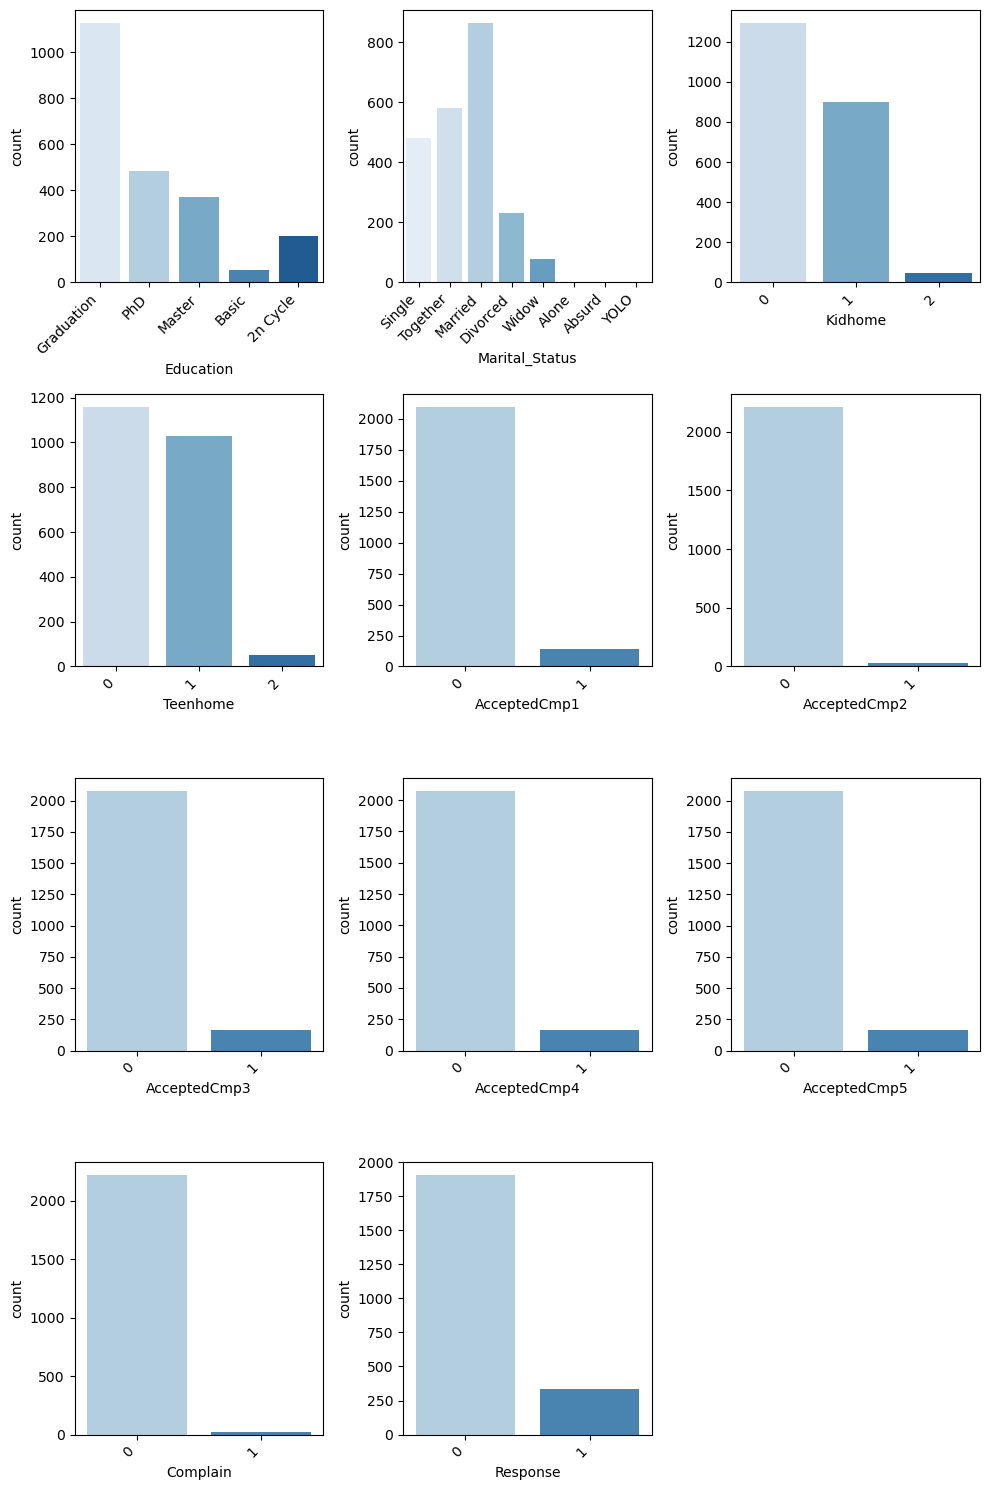

In [13]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(10, 15))
for i in range(4):
    for j in range(3):
        if (i == 3 and j == 2):
            break
        sns.countplot(data=Raw, x=cat_features[i*3 + j], ax=ax[i, j], palette='Blues')
        ax[i, j].set_xticklabels(ax[i, j].get_xticklabels(), rotation=45, ha="right")
ax[-1,-1].set_visible(False)
fig.tight_layout()

Most of the features are not balance.<br>
There are some similarity within (`Kidhome`, `Teenhome`) and (`AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `Response`).

#### Numerical features

In [14]:
Raw[num_features].describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
std,11.984069,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


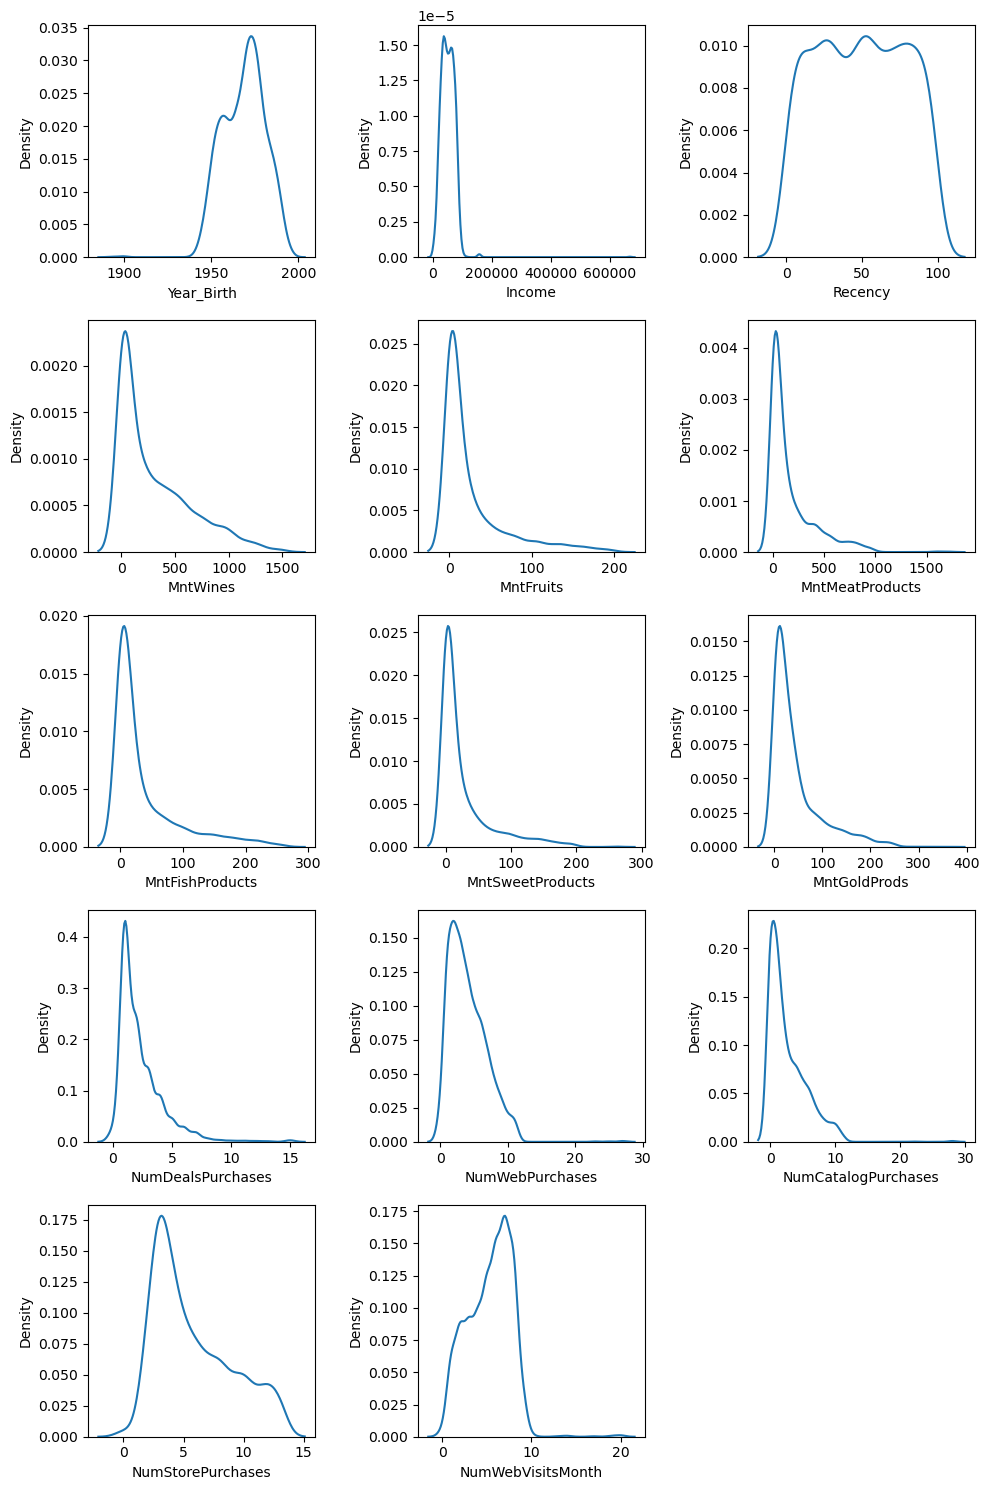

In [15]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(10, 15))
for i in range(5):
    for j in range(3):
        if (i == 4 and j == 2):
            break
        sns.kdeplot(data=Raw[num_features[j + i*3]], ax=ax[i, j])
ax[-1,-1].set_visible(False)
fig.tight_layout()

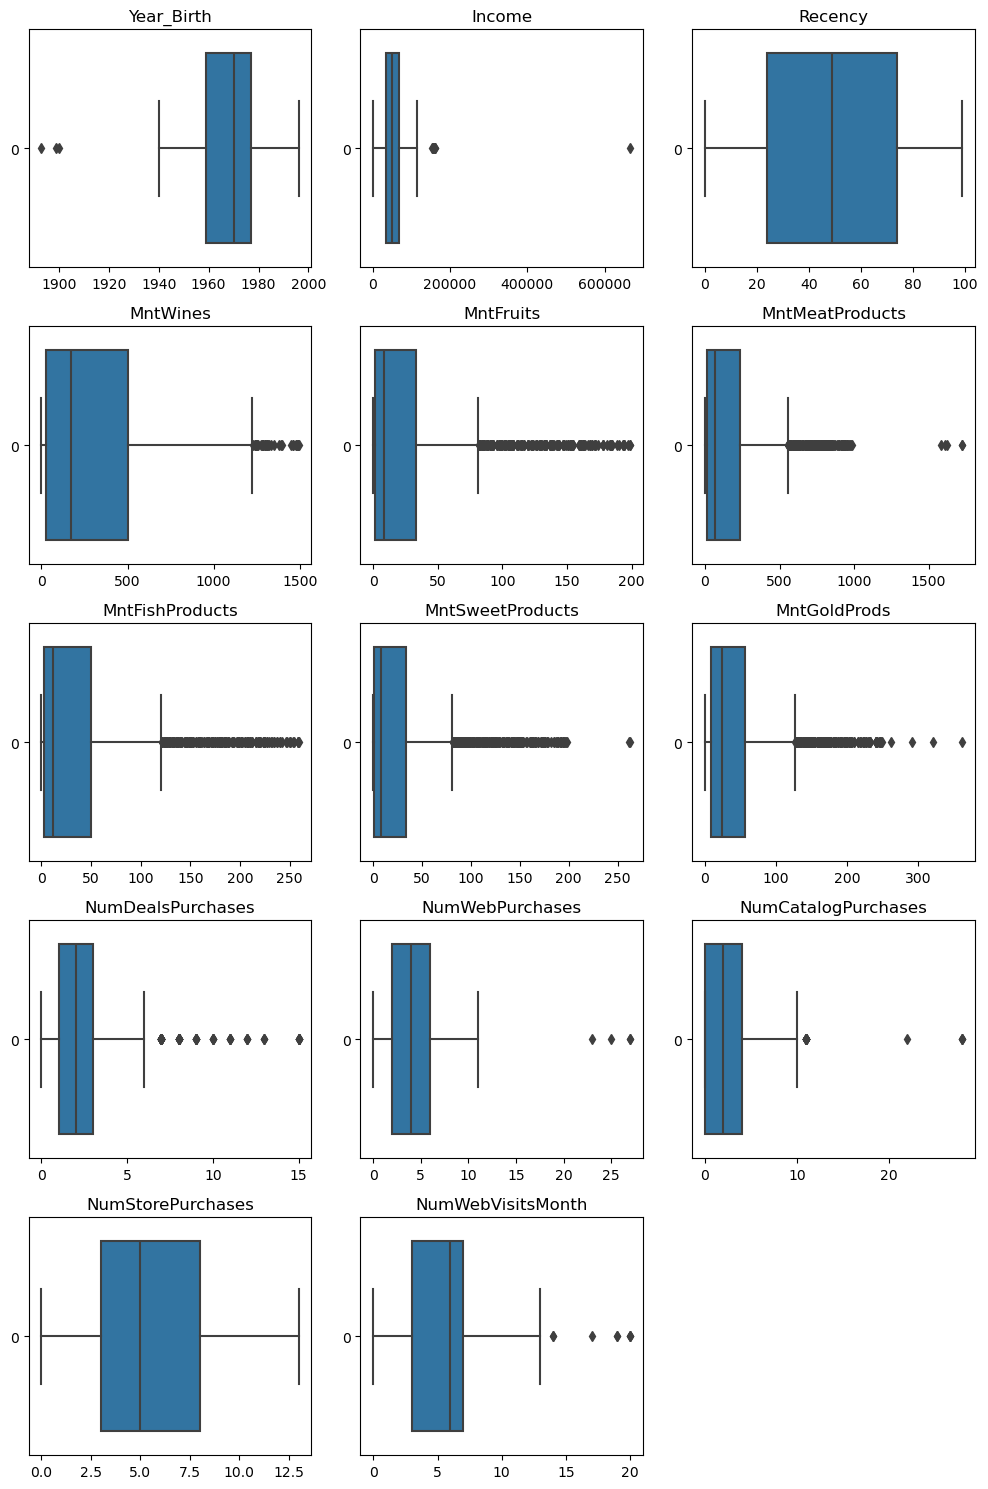

In [16]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(10, 15))
for i in range(5):
    for j in range(3):
        if (i == 4 and j == 2):
            break
        sns.boxplot(data=Raw[num_features[j + i*3]], ax=ax[i, j], orient='h')
        ax[i, j].set_title(num_features[j + i*3])
ax[-1,-1].set_visible(False)
fig.tight_layout()

- `Recency` is balance
- The min value 1893 in `Year_Birth` is very supicious.
- The `Mnt` features have similar distribution.

## Exploratory data analysis.

### Handle duplication

In [17]:
Raw.drop_duplicates(inplace=True)
print(Raw.shape)

(2058, 25)


### Handle missing values

In [18]:
for i, v in enumerate(Raw.isnull().sum()):
    if v > 0:
        print(f'{Raw.columns[i]:<10}- {v:<5}: {(v/Raw.shape[0])*100:.2f}%')

Income    - 24   : 1.17%


In [19]:
Raw.dropna(inplace=True)
print(Raw.isnull().sum().sum())

0


### Outliers

In [20]:
Data=Raw.copy()

* `Mnt Featues`

In other to simplize dataset, I will put the `Mnt features` in a bag.

In [21]:
mnts = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
num_features = [x for x in num_features if x not in mnts]
num_features.append('Total_spend')
Data['Total_spend'] = np.sum(Data[mnts], axis=1)
Data['Total_spend'].describe()

count    2034.000000
mean      607.637168
std       603.552763
min         5.000000
25%        69.000000
50%       397.000000
75%      1048.000000
max      2525.000000
Name: Total_spend, dtype: float64

<Axes: >

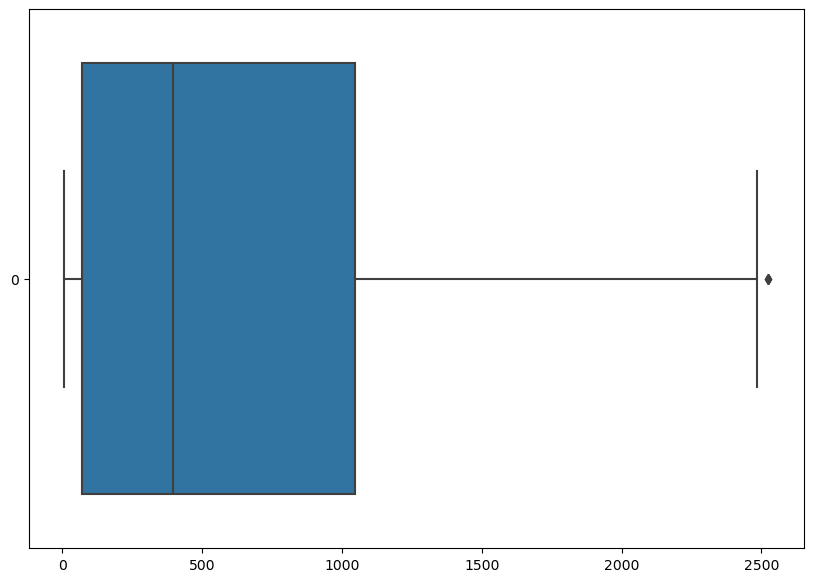

In [22]:
plt.figure(figsize=(10,7))
sns.boxplot(Data['Total_spend'], orient='h')

In [23]:
boundary = np.quantile(Data['Total_spend'], 0.99)
Data['Total_spend'] = Data['Total_spend'].apply(lambda x: x if x <= boundary else boundary)

<Axes: >

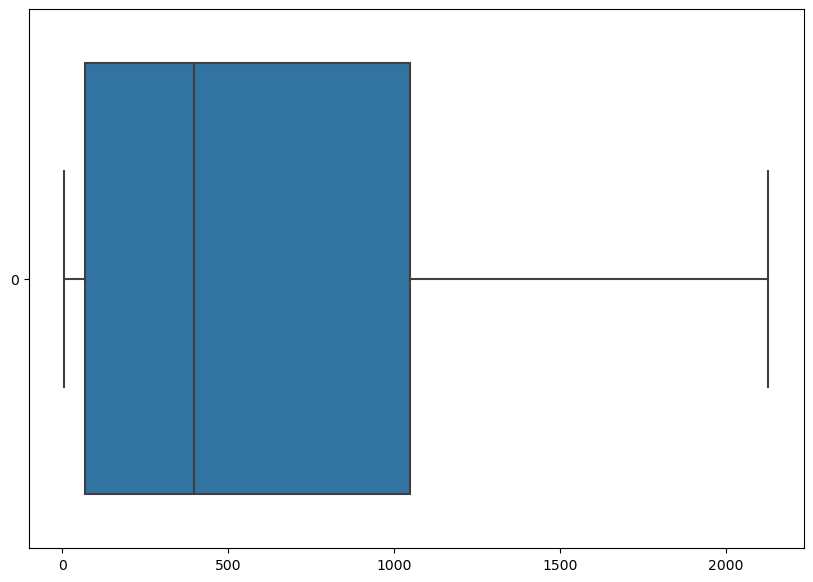

In [24]:
plt.figure(figsize=(10,7))
sns.boxplot(Data['Total_spend'], orient='h')

* `Purchased features`

In [25]:
purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
num_features = [x for x in num_features if x not in purchases]
num_features.append('Total_purchases')
Data['Total_purchases'] = np.sum(Data[purchases], axis=1)
Data['Total_purchases'].describe()

count    2034.000000
mean       14.889872
std         7.656462
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: Total_purchases, dtype: float64

<Axes: >

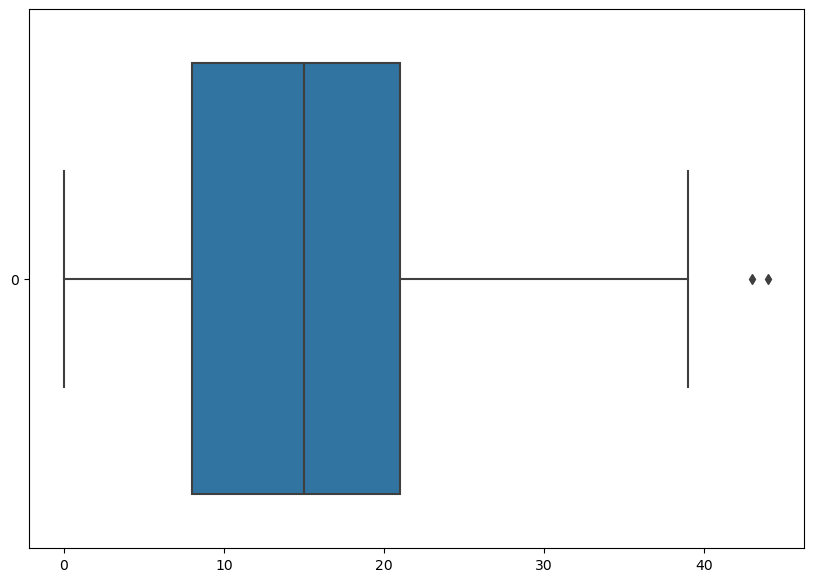

In [26]:
plt.figure(figsize=(10,7))
sns.boxplot(Data['Total_purchases'], orient='h')

<Axes: xlabel='Total_purchases', ylabel='Total_spend'>

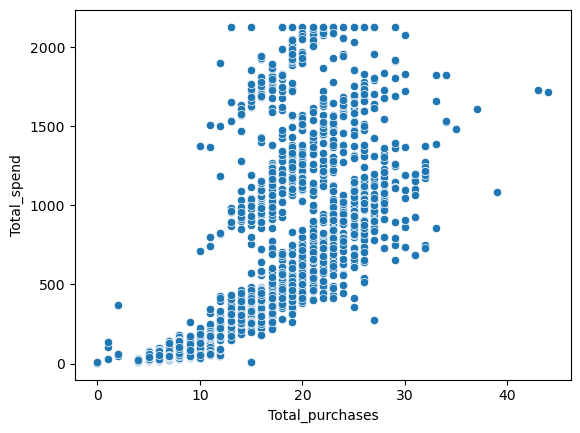

In [27]:
sns.scatterplot(data=Data, x='Total_purchases', y='Total_spend')

* Year_Birth

<Axes: >

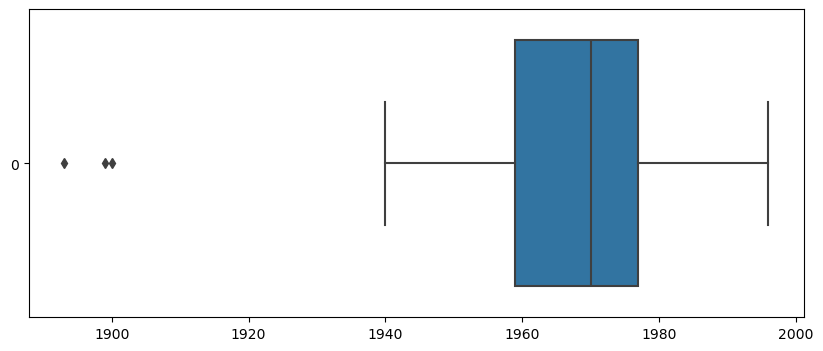

In [28]:
plt.figure(figsize=(10,4))
sns.boxplot(Data['Year_Birth'], orient='h')

According to data source, this dataset has been not updated since 2019. User with `Year_Birth` before 1949 was 70 year old. So that, every instance with `Year_Birth` smaller than 1949 may unreal and should be considered as outlier.

In [29]:
print(len(Data.loc[Data['Year_Birth'] < 1949]))

70


In [30]:
median = np.median(Data['Year_Birth'])
print('Median of Year_Birth:', median)

Median of Year_Birth: 1970.0


In [31]:
Data['Age'] = Data['Year_Birth'].apply(lambda x: 2019-x if x >= 1949 else 2019 - median)

<Axes: >

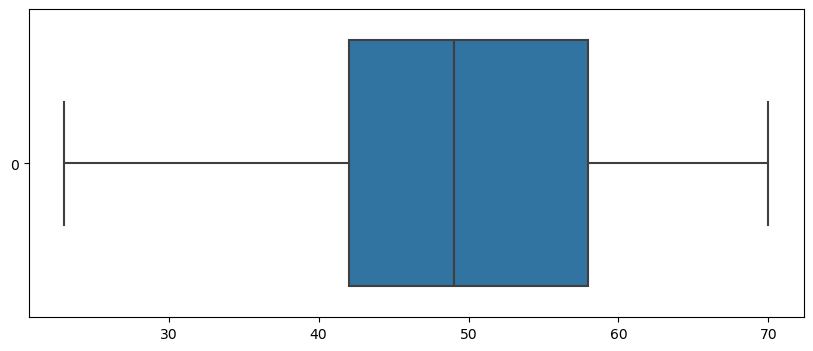

In [32]:
plt.figure(figsize=(10,4))
sns.boxplot(Data['Age'], orient='h')

- Income

We will check the boxplot of `Income`  because KDE plot prove this feature may has outliers.

<Axes: >

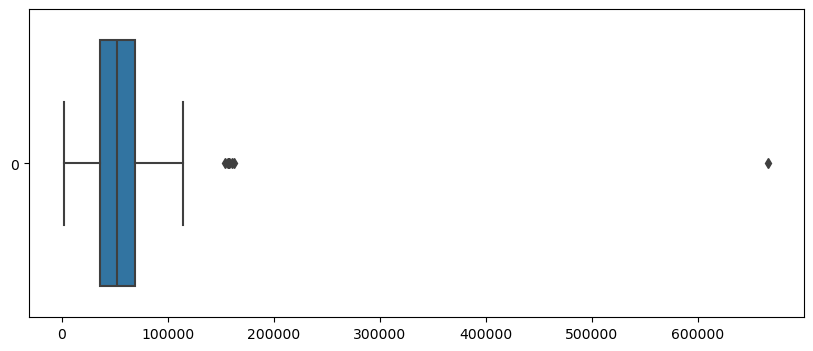

In [33]:
plt.figure(figsize=(10,4))
sns.boxplot(Data['Income'], orient='h')

In [34]:
Qlow = np.quantile(Data['Income'], 0.05)
Qhigh = np.quantile(Data['Income'], 0.95)
median = np.median(Data['Income'])
print('5th percentile: ', Qlow)
print('95th percentile: ', Qhigh)
print('median: ', median)

5th percentile:  18984.5
95th percentile:  84135.2
median:  51533.0


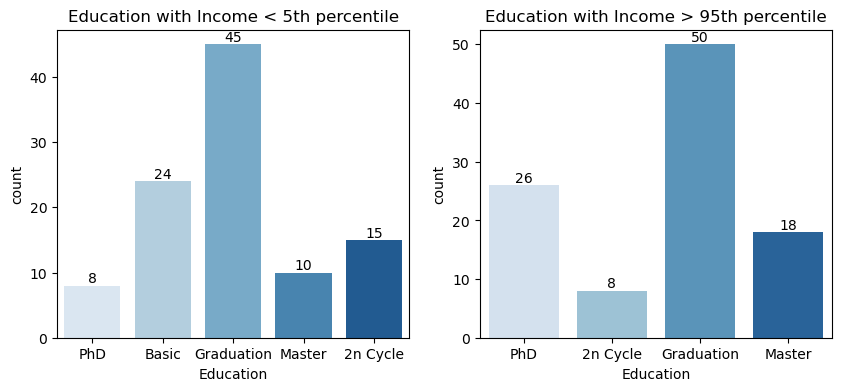

In [35]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

axs[0].set_title('Education with Income < 5th percentile')
ax = sns.countplot(data=Data[Data['Income'] < Qlow], x='Education', ax=axs[0], palette='Blues')
for i in ax.containers:
    ax.bar_label(i, )

axs[1].set_title('Education with Income > 95th percentile')
ax = sns.countplot(data=Data[Data['Income'] > Qhigh], x='Education', ax=axs[1], palette='Blues')
for i in ax.containers:
    ax.bar_label(i, )

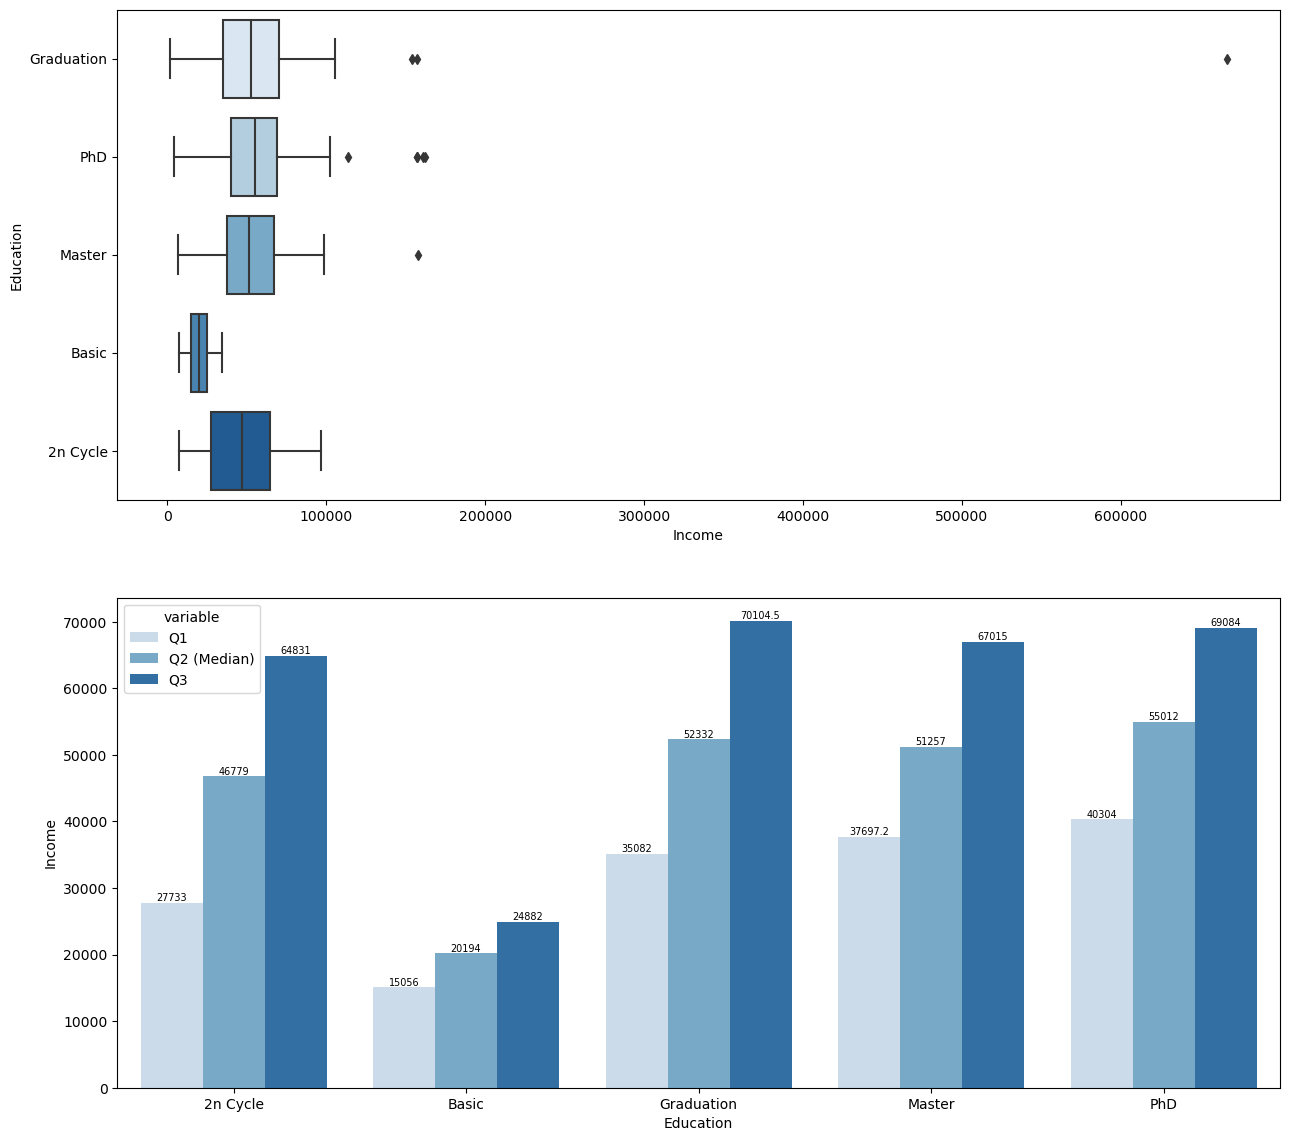

In [36]:
# Data.groupby('Education')['Income'].agg(['median', 'mean'])

edu_stats = Data.groupby('Education')['Income'].agg([
    ('Q1', lambda x: x.quantile(0.25)),
    ('Q2 (Median)', lambda x: x.quantile(0.5)),
    ('Q3', lambda x: x.quantile(0.75))
    ]).reset_index()
fig, axs = plt.subplots(nrows=2, figsize=(15, 14))
sns.boxplot(data=Data, x= 'Income', y= 'Education', orient='h', ax=axs[0], palette='Blues')

ax = sns.barplot(x='Education', 
                 y='Income', hue='variable',
                 data = pd.melt(edu_stats, id_vars=['Education'], value_name='Income'),
                 palette = 'Blues', ax=axs[1])
for i in ax.containers:
    ax.bar_label(i, size=7)

In [37]:

def impute_Income(row):
    x = row.iloc[3]
    if x <= Qhigh and x>= Qlow:
        return x
    edu = row.iloc[1]
    # print(edu)
    if x < Qlow:
        return np.quantile(Data[Data['Education'] == row.iloc[1]]['Income'], 0.25)
    return np.quantile(Data[Data['Education'] == row.iloc[1]]['Income'], 0.75)

In [38]:
Data['Income_'] = Data.apply(impute_Income, axis=1)
num_features.remove('Income')
num_features.append('Income_')

<Axes: >

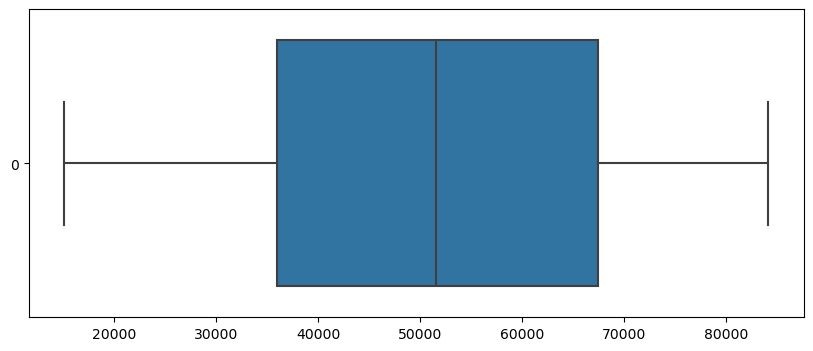

In [39]:
plt.figure(figsize=(10,4))
sns.boxplot(Data['Income_'], orient='h')

<Axes: xlabel='Income_', ylabel='Recency'>

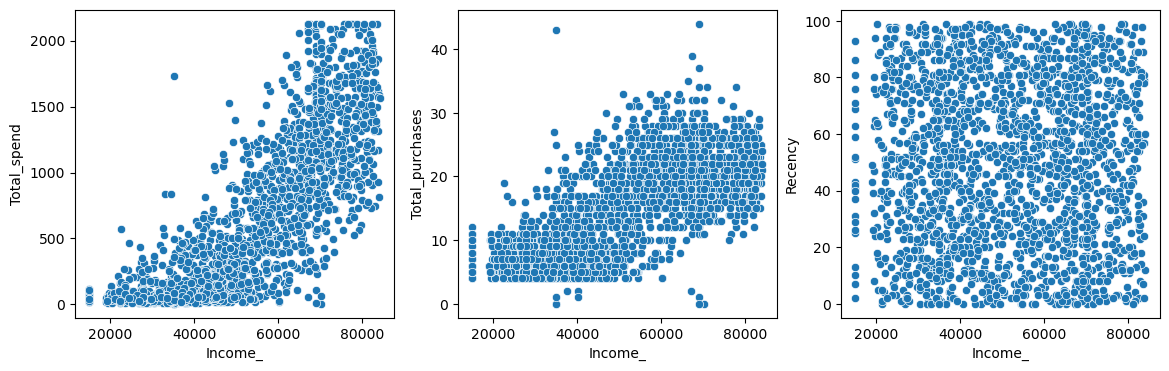

In [40]:
fig, axs = plt.subplots(ncols=3, figsize=(14, 4))
sns.scatterplot(x=Data['Income_'], y=Data['Total_spend'], ax=axs[0])
sns.scatterplot(x=Data['Income_'], y=Data['Total_purchases'], ax=axs[1])
sns.scatterplot(x=Data['Income_'], y=Data['Recency'], ax=axs[2])

1. Campaign features

In previous steps, we saw the similaritys of AcceptedCmp features. I will group them to get a new feature with 2 labels (0, 1) which mean:
- 0 user did not accept any offer.
- 1 user accepted at least one offer.

In [41]:
camps = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
def group_campaign():
    return [1 if x else 0 for x in np.any(Raw[camps], axis=1)]
print(len(group_campaign()))

2034


In [42]:
Data['Campaign'] = group_campaign()
cat_features = [x for x in cat_features if x not in camps]
cat_features.append('Campaign')

In [43]:
Data[camps + ['Campaign']].head(10)

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Campaign
0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0
8,0,0,0,0,0,1,1
9,0,0,1,0,0,0,1


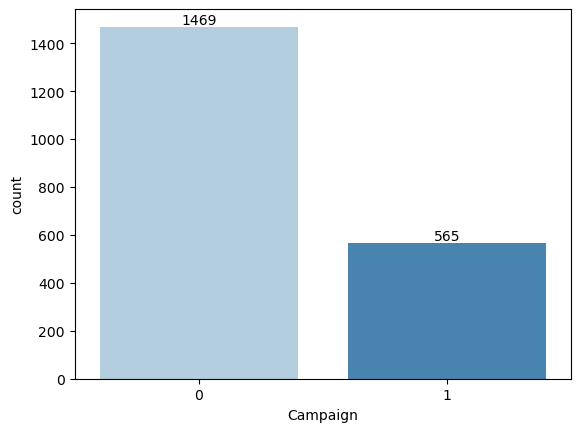

In [44]:
ax = sns.countplot(data=Data, x='Campaign', palette='Blues')
for i in ax.containers:
    ax.bar_label(i,)

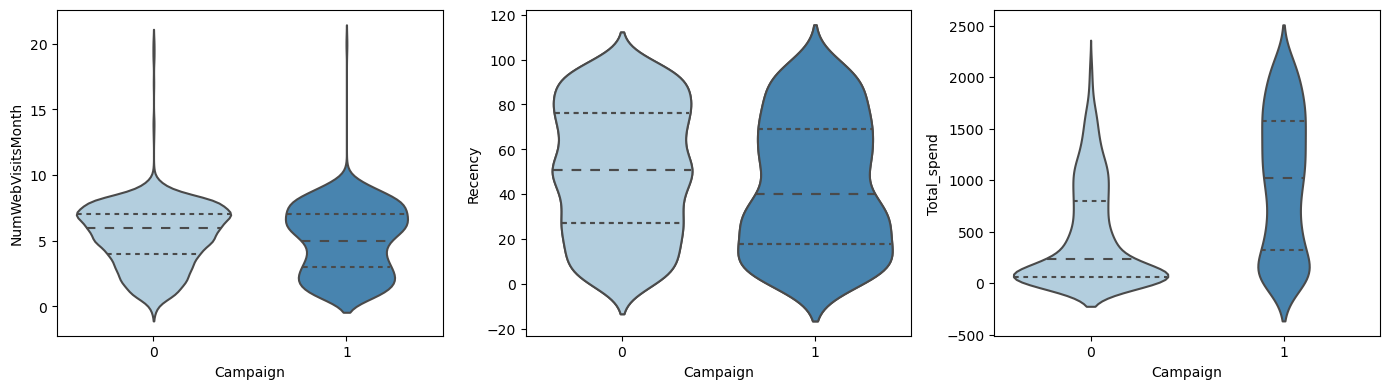

In [45]:
fig, axs = plt.subplots(ncols=3, figsize=(14, 4))
sns.violinplot(data=Data, x= 'Campaign', y= 'NumWebVisitsMonth', orient='v', ax=axs[0], palette='Blues', inner='quart')
sns.violinplot(data=Data, x= 'Campaign', y= 'Recency', orient='v', ax=axs[1], palette='Blues', inner='quart')
sns.violinplot(data=Data, x= 'Campaign', y= 'Recency', orient='v', ax=axs[1], palette='Blues', inner='quart')
sns.violinplot(data=Data, x= 'Campaign', y= 'Total_spend', orient='v', ax=axs[2], palette='Blues', inner='quart')
fig.tight_layout()

2. Complain

In [46]:
Data['Complain'].value_counts()

Complain
0    2014
1      20
Name: count, dtype: int64

3. Kids

In [47]:
kids = ['Kidhome', 'Teenhome']
def group_kids():
    return [1 if x else 0 for x in np.any(Raw[kids], axis=1)]
print(len(group_kids()))

2034


In [48]:
Data['Kids'] = group_kids()
cat_features = [x for x in cat_features if x not in kids]
cat_features.append('Kids')

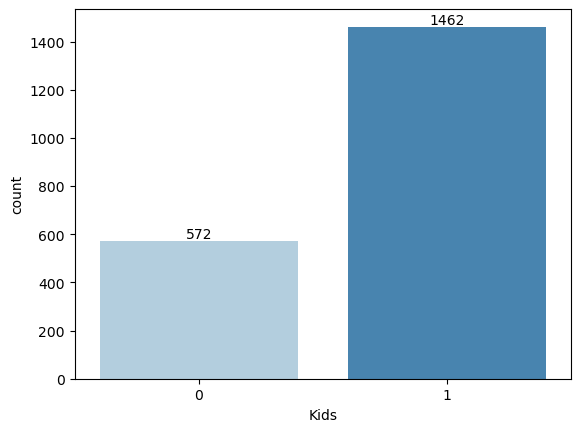

In [49]:
ax = sns.countplot(data=Data, x='Kids', palette='Blues')
for i in ax.containers:
    ax.bar_label(i,)

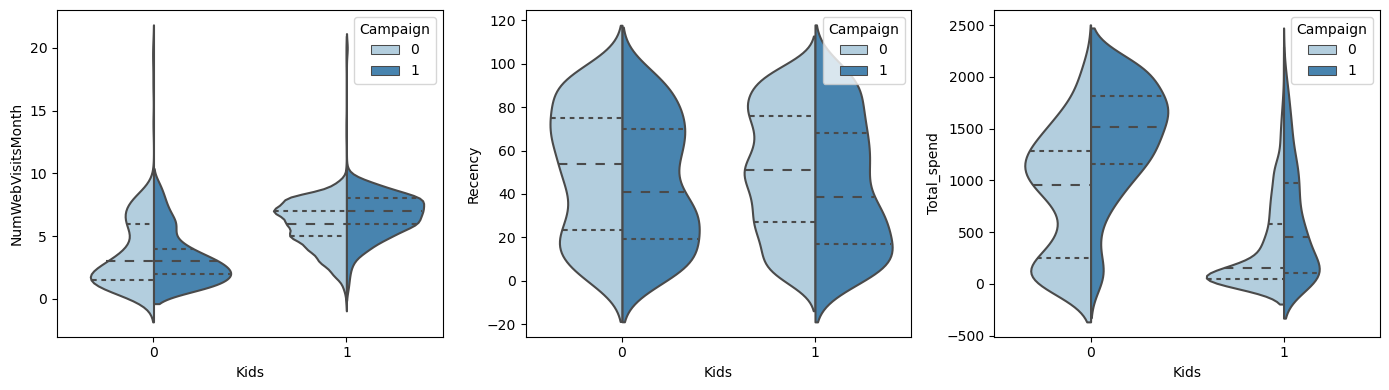

In [50]:
fig, axs = plt.subplots(ncols=3, figsize=(14, 4))
sns.violinplot(data=Data, x= 'Kids', y= 'NumWebVisitsMonth', orient='v', ax=axs[0], palette='Blues', inner='quart', hue='Campaign', split=True)
sns.violinplot(data=Data, x= 'Kids', y= 'Recency', orient='v', ax=axs[1], palette='Blues', inner='quart', hue='Campaign', split=True)
#sns.violinplot(data=Data, x= 'Campaign', y= 'Recency', orient='v', ax=axs[1], palette='Blues', inner='quart')
sns.violinplot(data=Data, x= 'Kids', y= 'Total_spend', orient='v', ax=axs[2], palette='Blues', inner='quart', hue='Campaign', split=True)
fig.tight_layout()

In [51]:
print(cat_features+num_features)

['Education', 'Marital_Status', 'Complain', 'Campaign', 'Kids', 'Year_Birth', 'Recency', 'NumWebVisitsMonth', 'Total_spend', 'Total_purchases', 'Income_']


In [55]:
correlation_matrix = Data[num_features].corr()
print(correlation_matrix['Recency'])
# plt.figure(figsize=(17,14))
# sns.heatmap(data=correlation_matrix, annot=True, fmt='.4f', cmap='Blues', linewidths=.5, annot_kws={"size": 10})

Year_Birth          -0.016989
Recency              1.000000
NumWebVisitsMonth   -0.013794
Total_spend          0.012923
Total_purchases      0.004726
Income_              0.004394
Name: Recency, dtype: float64
